# **PROBLEM STATEMENT**

## **Will Customer Suscribe to Term Deposit?**

The information relates to telephone-based direct marketing activities of a Portuguese banking institution. The classification's objective is to foretell whether a client will sign up for a term deposit (variable y).

The information relates to direct marketing activities run by a Portuguese bank. On phone conversations, the marketing campaigns were based. In order to determine if the product (bank term deposit) would be subscribed ('yes') or not ('no'), it was frequently necessary to make more than one contact with the same client. classification of the lient Deposit Data set

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

In [110]:
df = pd.read_csv('/content/Bank Client Deposit Data set Classification.csv')

In [111]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [112]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,4552,188,11,other,no


In [113]:
df.shape

(45211, 17)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [115]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [116]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,3.885559,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,67.985794,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,7661.000000,871.000000,275.000000


## **Pre-Processing Steps**

Seperating categorical and numerical columns

In [117]:
# Identify categorical and numerical features
categorical_features = []
numerical_features = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

# Print results
print("Categorical features: ", categorical_features)
print("Numerical features: ", numerical_features)



Categorical features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical features:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [118]:
# Select categorical columns (object data type)
cat_cols = df.select_dtypes(include=["object"])

# Loop through each categorical column and print unique values
for col in cat_cols:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print()

Unique values for column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values for column 'marital':
['married' 'single' 'divorced']

Unique values for column 'education':
['tertiary' 'secondary' 'unknown' 'primary']

Unique values for column 'default':
['no' 'yes']

Unique values for column 'housing':
['yes' 'no']

Unique values for column 'loan':
['no' 'yes']

Unique values for column 'contact':
['unknown' 'cellular' 'telephone']

Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values for column 'poutcome':
['unknown' 'failure' 'other' 'success']

Unique values for column 'y':
['no' 'yes']



In [119]:
# List of categorical features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Create a dictionary to store the mapping of categories to labels
cat_mapping = {}

# Loop through each categorical feature and encode the categories
for feature in cat_features:
    unique_cats = df[feature].unique()
    cat_mapping[feature] = {cat: label for label, cat in enumerate(unique_cats)}
    df[feature] = df[feature].apply(lambda x: cat_mapping[feature][x])

# Print the mapping of categories to labels for each categorical feature
for feature in cat_features:
    print(f'Mapping of categories to labels for {feature}: {cat_mapping[feature]}')


Mapping of categories to labels for job: {'management': 0, 'technician': 1, 'entrepreneur': 2, 'blue-collar': 3, 'unknown': 4, 'retired': 5, 'admin.': 6, 'services': 7, 'self-employed': 8, 'unemployed': 9, 'housemaid': 10, 'student': 11}
Mapping of categories to labels for marital: {'married': 0, 'single': 1, 'divorced': 2}
Mapping of categories to labels for education: {'tertiary': 0, 'secondary': 1, 'unknown': 2, 'primary': 3}
Mapping of categories to labels for default: {'no': 0, 'yes': 1}
Mapping of categories to labels for housing: {'yes': 0, 'no': 1}
Mapping of categories to labels for loan: {'no': 0, 'yes': 1}
Mapping of categories to labels for contact: {'unknown': 0, 'cellular': 1, 'telephone': 2}
Mapping of categories to labels for month: {'may': 0, 'jun': 1, 'jul': 2, 'aug': 3, 'oct': 4, 'nov': 5, 'dec': 6, 'jan': 7, 'feb': 8, 'mar': 9, 'apr': 10, 'sep': 11}
Mapping of categories to labels for poutcome: {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
Mapping of catego

In [120]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0


In [121]:
df.shape

(45211, 17)

In [122]:
# Check for missing values in each column
num_missing = df.isnull().sum()

# Print the number of missing values in each column
print(num_missing)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [123]:
# Loop through each categorical column in the dataframe and print the unique values
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    unique_values = df[col].unique()
    print(f'Unique values in column "{col}": {unique_values}')

In [124]:
# Check for special characters in the dataset
for col in df.columns:
    if df[col].dtype == object:
        special_chars = set([char for val in df[col] for char in str(val) if not char.isalnum()])
        if len(special_chars) > 0:
            print(f'Special characters found in column "{col}": {special_chars}')

# Check for NA values in the dataset
if df.isnull().sum().sum() > 0:
    print('NA values found in the dataset.')

In [125]:
df.dropna(inplace=True)

In [126]:
df.shape

(45211, 17)

write cooment

**Analysis of Categorical Data**

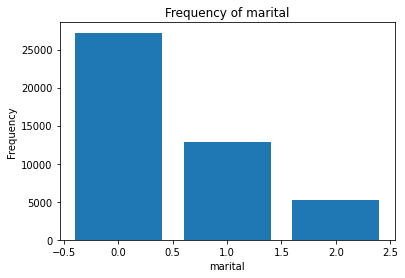

In [127]:

# Select a categorical variable to analyze
categorical_var = 'marital'

# Calculate frequency counts
freq_counts = df[categorical_var].value_counts()

# Create a bar graph of the frequency counts
plt.bar(freq_counts.index, freq_counts.values)

# Add labels and title
plt.xlabel(categorical_var)
plt.ylabel('Frequency')
plt.title('Frequency of ' + categorical_var)

# Show the graph
plt.show()

From the above graph , we can see that the **martial column** has three class values under which** married class** has a highest count of 25000 and **divorced class** has a lowest count of 5000.
 
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional 

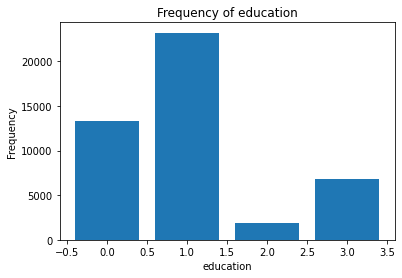

In [128]:
# Select a categorical variable to analyze
categorical_var = 'education'

# Calculate frequency counts
freq_counts = df[categorical_var].value_counts()

# Create a bar graph of the frequency counts
plt.bar(freq_counts.index, freq_counts.values)

# Add labels and title
plt.xlabel(categorical_var)
plt.ylabel('Frequency')
plt.title('Frequency of ' + categorical_var)

# Show the graph
plt.show()

From the above graph , we can see that the **education column** has 4 class values under which** secondary class** has a highest count of 25000 and **unknown class** has a lowest count of 2500.
 
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional 

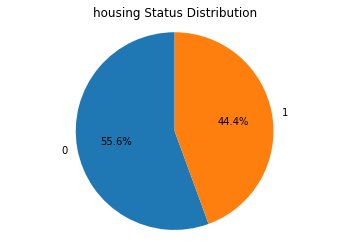

In [129]:
# Extract the categorical data column
category_data = df['housing']

# Count the number of occurrences of each category
category_counts = category_data.value_counts()

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('housing Status Distribution')
plt.show()

From the above pie chart , we can see that the **housing column** has two class values under which** yes** is distributed upto 55.6% and **no** is distributed upto 44.4%

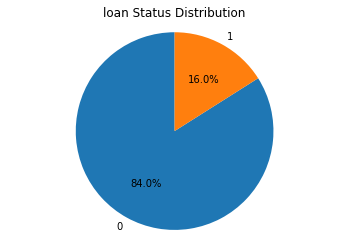

In [130]:
# Extract the categorical data column
category_data = df['loan']

# Count the number of occurrences of each category
category_counts = category_data.value_counts()

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('loan Status Distribution')
plt.show()

From the above pie chart , we can see that the **loan column** has two class values under which** yes** is distributed upto 16% and **no** is distributed upto 84.00 %

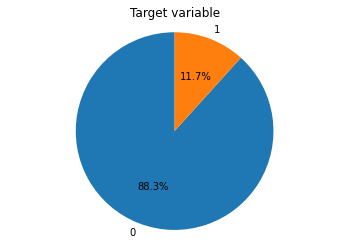

In [131]:
# Extract the categorical data column
category_data = df['y']

# Count the number of occurrences of each category
category_counts = category_data.value_counts()

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Target variable')
plt.show()

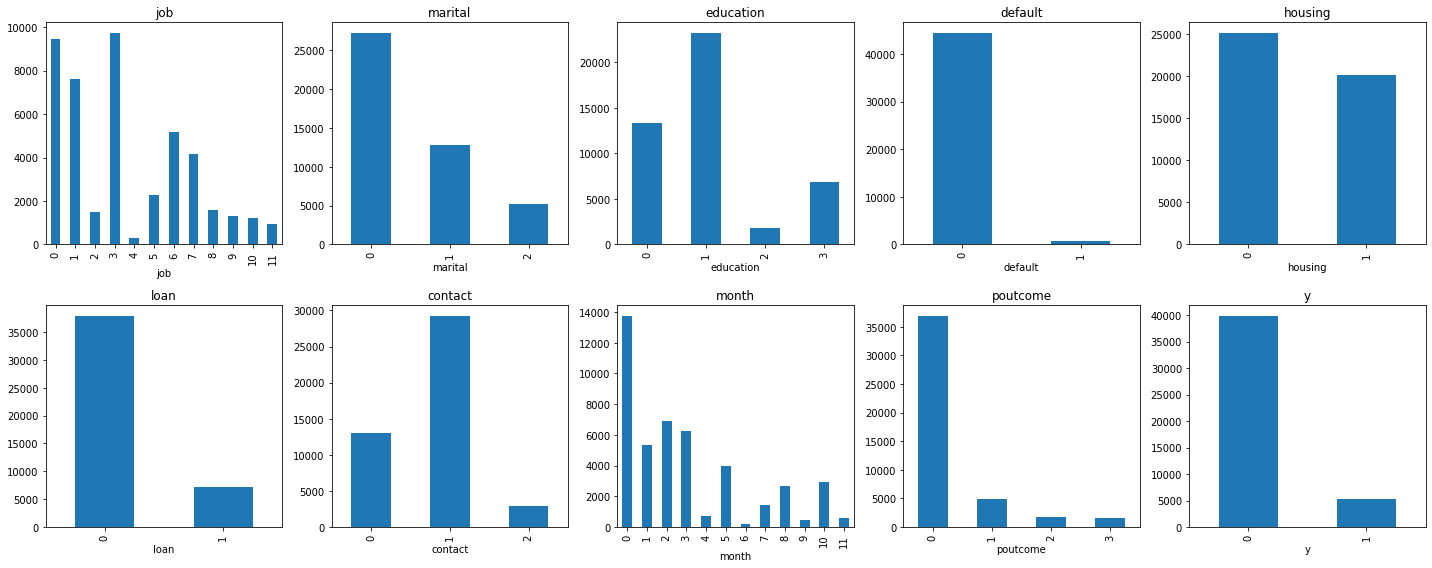

In [132]:
# Select the categorical and numerical features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Generate a cross-tabulation table for the categorical features
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for i, feature in enumerate(cat_features):
    ct = pd.crosstab(index=df[feature], columns='count')
    ax = axs[i // 5, i % 5]
    ct.plot(kind='bar', legend=None, ax=ax)  # set the color of the bars to blue
    ax.set_title(feature)
plt.tight_layout()
plt.show()



In [133]:
# Iterate through each categorical feature and find the mode and its percentage
for feature in cat_features:
    mode_value = df[feature].mode()[0]
    mode_percent = (df[feature] == mode_value).mean() * 100
    print(f"Mode of {feature} is {mode_value}, and it appears in {mode_percent:.2f}% of the data.")

Mode of job is 3, and it appears in 21.53% of the data.
Mode of marital is 0, and it appears in 60.19% of the data.
Mode of education is 1, and it appears in 51.32% of the data.
Mode of default is 0, and it appears in 98.20% of the data.
Mode of housing is 0, and it appears in 55.58% of the data.
Mode of loan is 0, and it appears in 83.98% of the data.
Mode of contact is 1, and it appears in 64.77% of the data.
Mode of month is 0, and it appears in 30.45% of the data.
Mode of poutcome is 0, and it appears in 81.75% of the data.
Mode of y is 0, and it appears in 88.30% of the data.


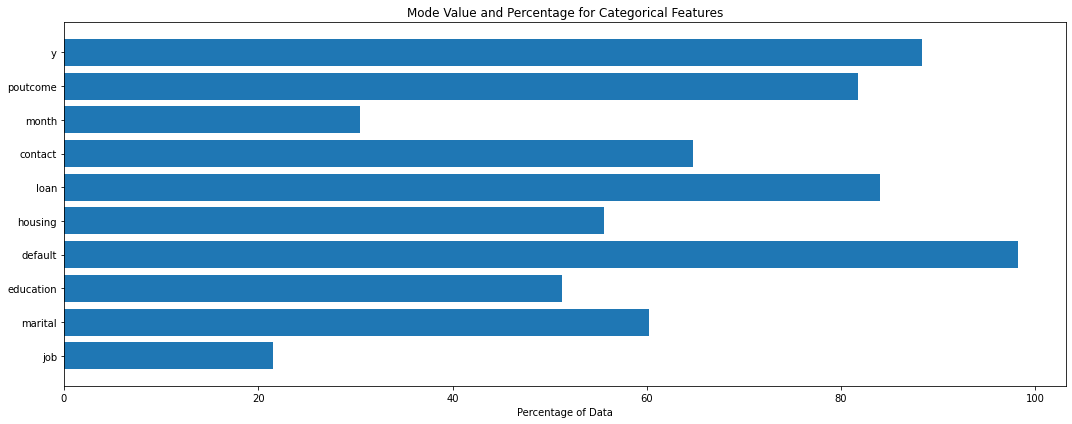

In [134]:
# Initialize lists to store mode values and percentages
mode_values = []
mode_percents = []

# Iterate through each categorical feature and find the mode and its percentage
for feature in cat_features:
    mode_value = df[feature].mode()[0]
    mode_percent = (df[feature] == mode_value).mean() * 100
    mode_values.append(mode_value)
    mode_percents.append(mode_percent)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(15,6))
y_pos = range(len(cat_features))
ax.barh(y_pos, mode_percents, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(cat_features)
ax.set_xlabel('Percentage of Data')
ax.set_title('Mode Value and Percentage for Categorical Features')
plt.tight_layout()
plt.show()

**Analysis of Numerical Data**

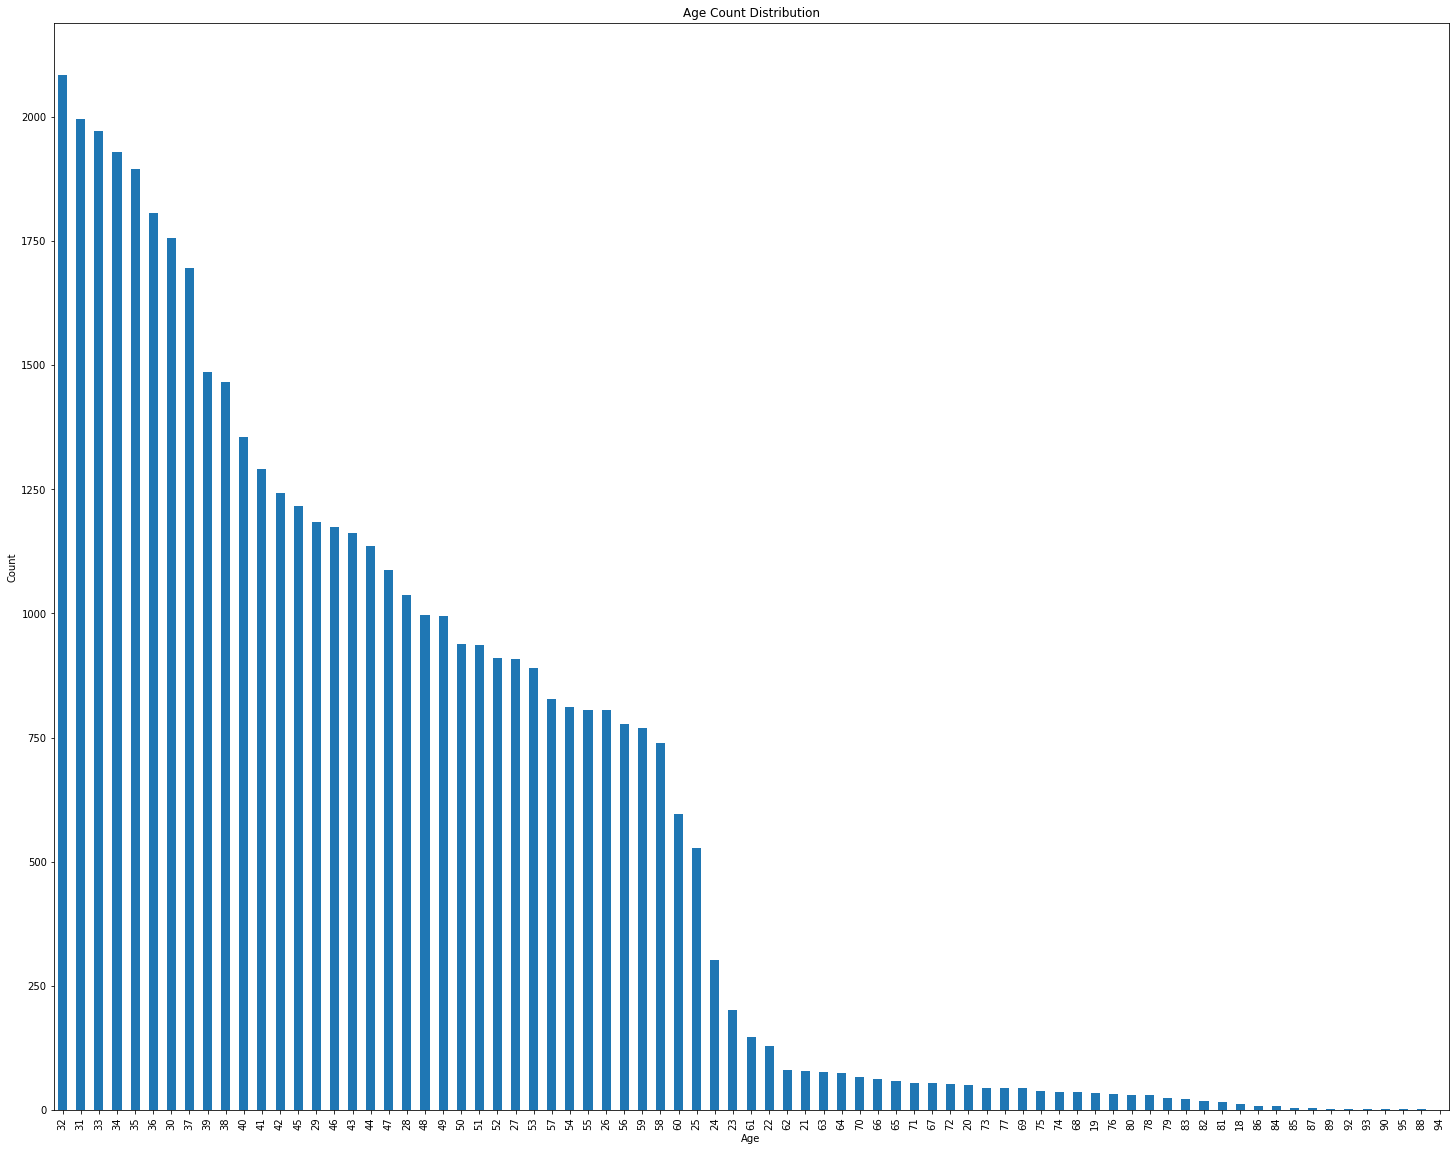

In [135]:
# count distribution of 'age' column
age_counts = df['age'].value_counts()

# plot bar graph with larger figure size
plt.figure(figsize=(25, 20))   # set the figure size to 10x6 inches
age_counts.plot(kind='bar')

# set title and axis labels
plt.title('Age Count Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

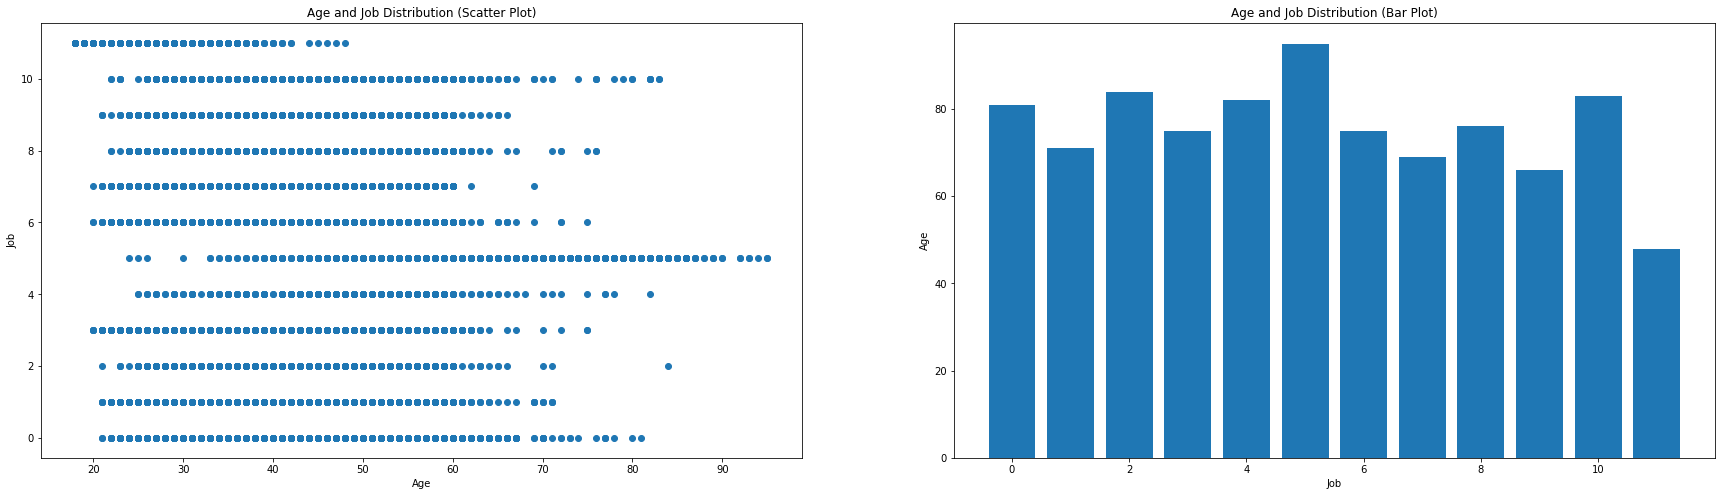

In [136]:
# Sort the dataframe by age in ascending order
df = df.sort_values('age')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(30, 8))

# Plot the data as a scatter plot in the first subplot
axs[0].scatter(df['age'], df['job'])
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Job")
axs[0].set_title("Age and Job Distribution (Scatter Plot)")

# Plot the data as a bar plot in the second subplot
axs[1].bar(df['job'], df['age'])
axs[1].set_xlabel("Job")
axs[1].set_ylabel("Age")
axs[1].set_title("Age and Job Distribution (Bar Plot)")

# Show the figure
plt.show()

<ipython-input-137-a447e39fab14>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
<ipython-input-137-a447e39fab14>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
<ipython-input-137-a447e39fab14>:9: UserWarning: 

`distplot` is a deprecated function and

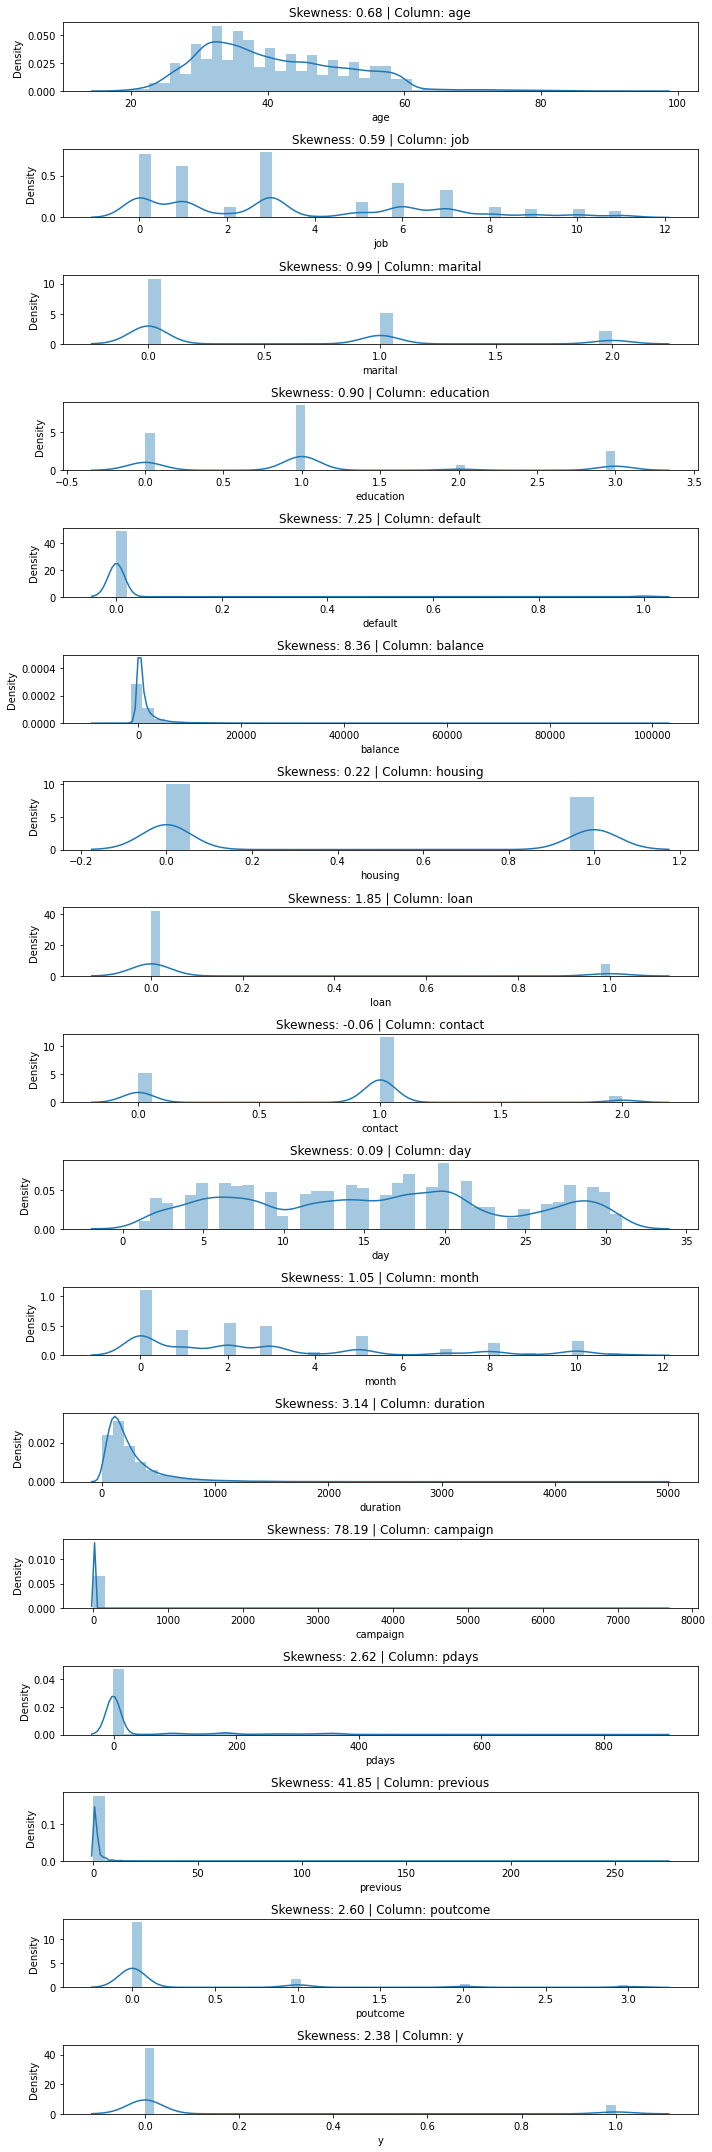

In [137]:
 #Get numeric columns in the dataset
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 30))

# Iterate over each numeric column and plot its distribution
for i, col in enumerate(numeric_cols):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title("Skewness: {:.2f} | Column: {}".format(df[col].skew(), col))

plt.tight_layout()
plt.show()

# Defining Random Forest Algorithm

In [138]:
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
      predictions = np.zeros((len(X), len(self.trees)))
      for i, tree in enumerate(self.trees):
          predictions[:, i] = tree.predict(X)
      return np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=predictions)


    
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.feature_indices = None
        self.thresholds = None
        self.left = None
        self.right = None
        self.label = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        if self.max_depth is None:
            self.max_depth = n_features

        if self.min_samples_split is None:
            self.min_samples_split = 2

        if n_samples < self.min_samples_split or self.max_depth == 0 or np.unique(y).shape[0] == 1:
            self.label = np.bincount(y).argmax()
            return

        self.feature_indices = np.random.choice(n_features, int(np.sqrt(n_features)), replace=False)
        best_feature_index, best_threshold = self.find_best_split(X, y)

        if best_feature_index is None or best_threshold is None:
            self.label = np.bincount(y).argmax()
            return

        self.thresholds = best_threshold

        left_indices = X[:, best_feature_index] < best_threshold
        right_indices = X[:, best_feature_index] >= best_threshold

        self.left = DecisionTreeClassifier(
            max_depth=self.max_depth - 1,
            min_samples_split=self.min_samples_split
        )
        self.left.fit(X[left_indices], y[left_indices])

        self.right = DecisionTreeClassifier(
            max_depth=self.max_depth - 1,
            min_samples_split=self.min_samples_split
        )
        self.right.fit(X[right_indices], y[right_indices])

    def find_best_split(self, X, y):
        best_feature_index, best_threshold, best_gini = None, None, 1

        for feature_index in self.feature_indices:
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = X[:, feature_index] >= threshold

                if left_indices.sum() < self.min_samples_split or right_indices.sum() < self.min_samples_split:
                    continue

                left_gini = self.gini(y[left_indices])
                right_gini = self.gini(y[right_indices])
                gini = (left_gini * left_indices.sum() + right_gini * right_indices.sum()) / len(y)

                if gini < best_gini:
                    best_threshold = threshold
                    best_gini = gini
                    return best_feature_index, best_threshold

    def gini(self, y):
      _, counts = np.unique(y, return_counts=True)
      proportions = counts / len(y)
      return 1 - np.sum(proportions ** 2)

    def predict(self, X):
       if self.label is not None:
           return np.ones(len(X)) * self.label

       left_indices = X[:, self.feature_indices] < self.thresholds
       right_indices = X[:, self.feature_indices] >= self.thresholds

       left_predictions = self.left.predict(X[left_indices])
       right_predictions = self.right.predict(X[right_indices])

       predictions = np.ones(len(X)) * self.label
       predictions[left_indices] = left_predictions
       predictions[right_indices] = right_predictions

       return predictions




## Train Test Split 

In [139]:
# Define train-test-split function
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:n_test]
    train_indices = shuffled_indices[n_test:]
    
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [140]:
# Define the X and y variables
X = df.drop("y", axis=1)
y = df["y"]

In [141]:
X.shape
y.shape

(45211,)

In [142]:
X=np.array(X) # converting X into numpy array
y=np.array(y) # converting y into numpy array

In [143]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [144]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test).astype(int)


## Checking Accuracy

In [145]:
# Training accuracy
y_train_pred = rf.predict(X_train).astype(int)
train_acc = sum(y_train_pred == y_train) / len(y_train)
print(f'Training accuracy: {train_acc:.4f}')

# Testing accuracy
y_test_pred = rf.predict(X_test).astype(int)
test_acc = sum(y_test_pred == y_test) / len(y_test)
print(f'Testing accuracy: {test_acc:.4f}')

Training accuracy: 0.8832
Testing accuracy: 0.8827


In [146]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test[i] == 1:
        tp += 1
    elif y_pred[i] == 0 and y_test[i] == 0:
        tn += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_test[i] == 1:
        fn += 1

# Calculate accuracy, precision, recall, and f1 score
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Print the results
print("True positives: {}".format(tp))
print("True negatives: {}".format(tn))
print("False positives: {}".format(fp))
print("False negatives: {}".format(fn))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1_score))


True positives: 0
True negatives: 11972
False positives: 0
False negatives: 1591
Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1 score: 0.00


## **Hyper-Parameter Tuning**

In [147]:
def cross_validate(model, X, y, k):
    indices = np.random.permutation(X.shape[0])
    fold_size = int(X.shape[0] / k)
    scores = []
    for i in range(k):
        test_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate((indices[:i*fold_size], indices[(i+1)*fold_size:]))
        X_train, y_train, X_test, y_test = X[train_indices], y[train_indices], X[test_indices], y[test_indices]
        model.fit(X_train, y_train)
        score = evaluate(model, X_test, y_test)
        scores.append(score)
    return np.mean(scores)


In [148]:
def accuracy_score(y_true, y_pred):
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            num_correct += 1
    return num_correct / len(y_true)


In [149]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    return accuracy


In [150]:
import numpy as np

# Define the hyperparameters and their possible values
n_trees = [10, 50, 100]
max_depth = [None, 10, 20]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
max_features = ['sqrt', 'log2']

# Set the number of iterations for the randomized search
n_iter = 50

# Initialize the best score and parameters
best_score = 0
best_params = None

# Perform the randomized search
for i in range(n_iter):
    # Randomly select values for each hyperparameter
    trees = np.random.choice(n_trees)
    depth = np.random.choice(max_depth)
    split = np.random.choice(min_samples_split)
    leaf = np.random.choice(min_samples_leaf)
    feature = np.random.choice(max_features)
    
    # Initialize the model with the randomly selected hyperparameters
    model = RandomForestClassifier(n_estimators=trees, max_depth=depth, min_samples_split=split)
    
    # Perform cross-validation and get the mean score
    score = cross_validate(model, X, y, k=5)
    
    # Check if this score is better than the previous best score
    if score > best_score:
        best_score = score
        best_params = {'n_trees': trees, 'max_depth': depth, 'min_samples_split': split,
                       'min_samples_leaf': leaf, 'max_features': feature}

# Print the best parameters and score
print("Best parameters: ", best_params)
print("Best score: ", best_score)


Best parameters:  {'n_trees': 10, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Best score:  0.8830347268303473


## **Checking the time to predict the test data**

In [151]:
import time
# record start time
start_time = time.time()

In [152]:

# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [158]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 66.70 seconds


### **SMOTE TECHNIQUE**

In [163]:
from imblearn.over_sampling import SMOTE


# Instantiate SMOTE with the desired parameters
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model on the resampled training data
rfsm = RandomForestClassifier()
rfsm.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = rfsm.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest model: {acc:.4f}')

Accuracy of the Random Forest model: 0.1173


In [160]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test[i] == 1:
        tp += 1
    elif y_pred[i] == 0 and y_test[i] == 0:
        tn += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_test[i] == 1:
        fn += 1

# Calculate accuracy, precision, recall, and f1 score
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Print the results
print("True positives: {}".format(tp))
print("True negatives: {}".format(tn))
print("False positives: {}".format(fp))
print("False negatives: {}".format(fn))
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1_score))

True positives: 1591
True negatives: 0
False positives: 11972
False negatives: 0
Accuracy: 0.12
Precision: 0.12
Recall: 1.00
F1 score: 0.21
